# Data Preparation

## Ciências de Dados - Izabela Hendrix

### Prof. Neylson Crepalde

#### Lidando com Missing Values

É conhecido que os algoritmos de *Machine Learning* não funcionam com valores missing, ou seja, não respostas. O tratamento desses dados não é algo trivial.

Uma opção seria apenas descartar esses casos (linhas do dataset). Se a quantidade é desprezível em relação ao tamanho do banco, a alternativa se apresenta como viável. Entretanto, quando a quantidade de valores *missing* é muito grande e ocorre em diferentes linhas ao longo das variáveis disponíveis, podemos terminar com uma amostra muito pequena e, portanto, inutilizável do dataset inicial.

Precisamos de métodos e técnicas para tratar dos dados missing.

### Missing Data em variáveis numéricas

Em variáveis numéricas, existem alguns procedimentos para imputação de valores *missing*. Podemos imputar a média ou a mediana (procedimento bastante comum). Vejamos como fazer com `pandas`. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer

In [3]:
enade = pd.read_csv("https://github.com/neylsoncrepalde/introducao_ao_r/raw/master/dados/enade_2014_amostra.csv", sep=";")
enade.head()

,nu_ano,co_grupo,co_ies,co_catad,co_orgac,co_munic_curso,co_uf_curso,co_regiao_curso,nu_idade,tp_sexo,...,qe_i72,qe_i73,qe_i74,qe_i75,qe_i76,qe_i77,qe_i78,qe_i79,qe_i80,qe_i81
0,2014,2001,671,10005,10028,5002704,50,5,36,F,...,a,a,a,b,a,c,a,a,b,a
1,2014,2402,597,93,10028,3170107,31,3,23,F,...,c,a,a,d,c,a,a,a,a,a
2,2014,5902,343,10005,10020,3106200,31,3,27,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,4006,521,10005,10028,3530607,35,3,20,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,6208,4428,10003,10022,3302403,33,3,24,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
enade.shape

(10000, 155)

In [4]:
enade.nt_ger.describe()

count    8276.000000
mean      399.618536
std       184.300570
min         0.000000
25%       292.000000
50%       414.000000
75%       528.000000
max       943.000000
Name: nt_ger, dtype: float64

In [5]:
# Contando os NAs
enade.nt_ger.isna().sum()

1724

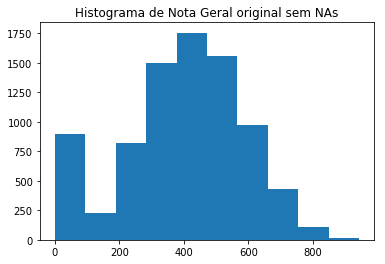

In [19]:
plt.hist(enade.nt_ger.dropna())
plt.title("Histograma de Nota Geral original sem NAs")
plt.show()

Temos 1724 *NAs* de 10000 casos. Vamos imputar a média.

In [14]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
imputado = imp_mean.fit_transform(enade[["nt_ger", "nu_idade"]])
imputado = pd.DataFrame(imputado, columns=["nt_ger", "nu_idade"])
print(imputado.nt_ger.describe(), end="\n\n")
print(imputado.nt_ger.isna().sum(), "NAs...")

count    10000.000000
mean       399.618536
std        167.661133
min          0.000000
25%        321.000000
50%        399.618536
75%        503.000000
max        943.000000
Name: nt_ger, dtype: float64

0 NAs...


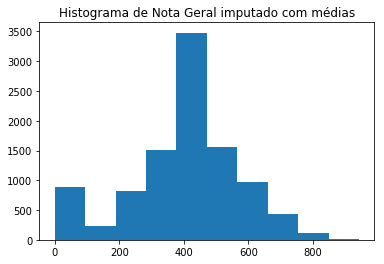

In [15]:
plt.hist(imputado.nt_ger)
plt.title("Histograma de Nota Geral imputado com médias")
plt.show()

Podemos também imputar a mediana.

In [21]:
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
imputado_median = imp_median.fit_transform(enade[["nt_ger", "nu_idade"]])
imputado_median = pd.DataFrame(imputado_median, columns=["nt_ger", "nu_idade"])
print(imputado_median.nt_ger.describe(), end="\n\n")
print(imputado_median.nt_ger.isna().sum(), "NAs...")

count    10000.000000
mean       402.097900
std        167.749122
min          0.000000
25%        321.000000
50%        414.000000
75%        503.000000
max        943.000000
Name: nt_ger, dtype: float64

0 NAs...


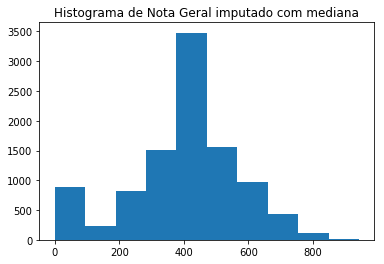

In [22]:
plt.hist(imputado_median.nt_ger)
plt.title("Histograma de Nota Geral imputado com mediana")
plt.show()

A classe `SimpleImputer` nos permite ainda imputar o valor mais frequente na coluna (a moda) e um valor constante. A vantagem da primeira abordagem é a possibilidade de imputar também a colunas que sejam `string`. Vejamos:

In [23]:
print(enade.qe_i2.value_counts())
print(enade.qe_i2.isna().sum())

a    4606
c    2988
b     893
d     129
e      78
Name: qe_i2, dtype: int64
1306


In [32]:
imputer_moda = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imputado_mode = imputer_moda.fit_transform(enade[["nt_ger", "qe_i2"]])
imputado_mode = pd.DataFrame(imputado_mode, columns=["nt_ger", "qe_i2"])
imputado_mode.nt_ger = pd.to_numeric(imputado_mode.nt_ger)
imputado_mode

,nt_ger,qe_i2
0,421.0,c
1,357.0,a
2,422.0,c
3,422.0,a
4,598.0,a
5,292.0,a
6,422.0,a
7,642.0,c
8,598.0,a
9,443.0,c


In [33]:
print(imputado_mode.nt_ger.describe(), end="\n\n")
print(imputado_mode.nt_ger.isna().sum(), "NAs...")
print(imputado_mode.qe_i2.isna().sum(), "NAs...")

count    10000.000000
mean       403.477100
std        167.874163
min          0.000000
25%        321.000000
50%        422.000000
75%        503.000000
max        943.000000
Name: nt_ger, dtype: float64

0 NAs...
0 NAs...
